In [51]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import time





# Configurar pandas para mostrar todas las filas y columnas
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
#pd.set_option('display.width', None)
#pd.set_option('display.max_colwidth', None)


data = pd.read_excel(r"E:\Cursos\BC_Data_Science\Repositorio\ONLINE_DS_THEBRIDGE_V_NEW\proyecto EDA\DATASETS\DATASETS MODIFICADOS\df_modificado_final_eda.xlsx")

In [39]:
data.head(1)

,Anyo,Fecha,Hora,Hora_entera,Intervalo,IP Origen,Destino IP,Datos_geolocalizacion,Tipo_ataque,Nivel_severidad,Datos_carga_util,Resultado_analisis,Cluster,Etiqueta,Indicadores_malware,Puntuaciones_anomalias,Informacion_usuario,Informacion_dispositivo
0,2023,2023-05-30,2023-12-25 06:33:58,6,6-9,103.216.15.12,84.9.164.252,"Jamshedpur, Sikkim",Malware,Low,Qui natus odio asperiores nam. Optio nobis ius...,"{'entidades': [], 'partes_del_discurso': ['PRO...",0.067699,anómala,IoC Detected,2867,Reyansh Dugal,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...


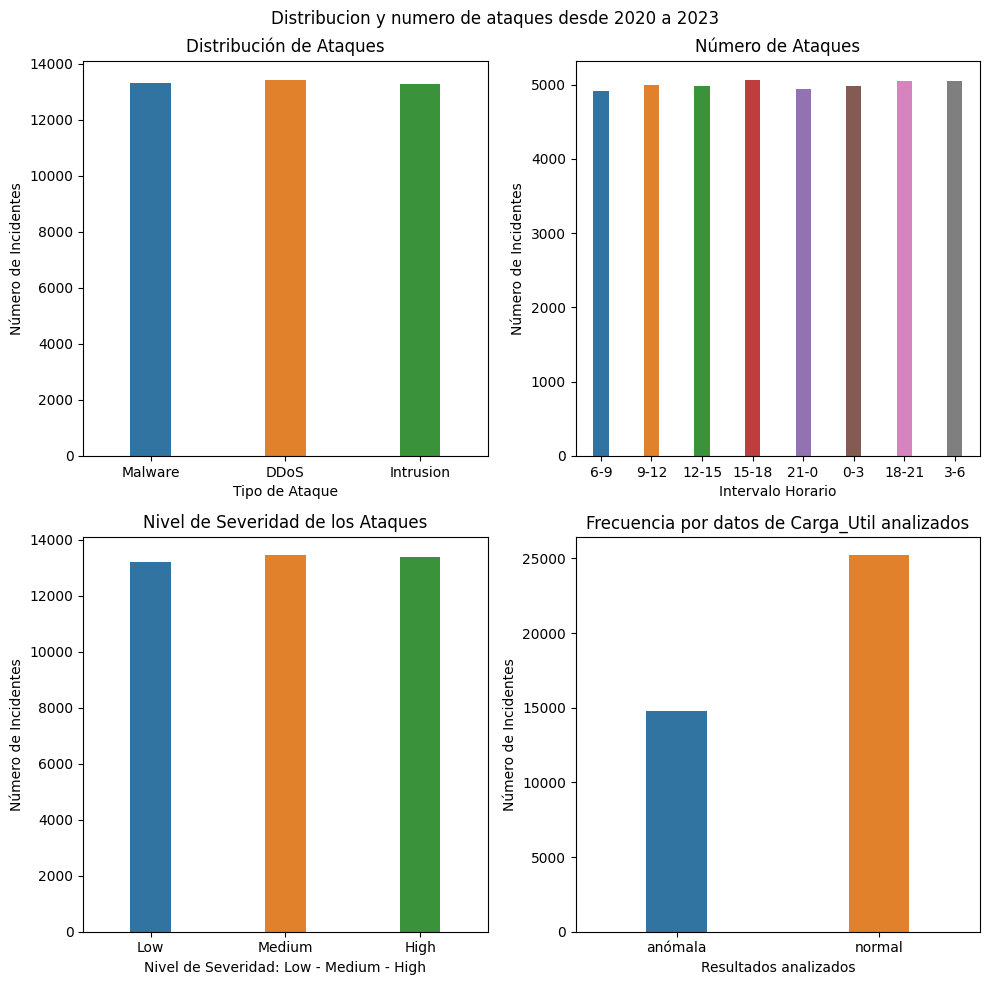

In [5]:
#creo la figura
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
fig.suptitle("Distribucion y numero de ataques desde 2020 a 2023")
axs = axs.flatten()

# Ajuste del ancho de las barras
bar_width = 0.3

# Distribución de Ataques
sns.countplot(x='Tipo_ataque', data=data, ax=axs[0], width=bar_width)
axs[0].set_title('Distribución de Ataques')
axs[0].set_xlabel('Tipo de Ataque')
axs[0].set_ylabel('Número de Incidentes')

# Análisis Temporal
sns.countplot(x='Intervalo', data=data, ax=axs[1],width=bar_width)
axs[1].set_title('Número de Ataques')
axs[1].set_xlabel('Intervalo Horario')
axs[1].set_ylabel('Número de Incidentes')

# Consecuencias y Respuestas
sns.countplot(x='Nivel_severidad', data=data, ax=axs[2],width=bar_width)
axs[2].set_title('Nivel de Severidad de los Ataques')
axs[2].set_xlabel('Nivel de Severidad: Low - Medium - High')
axs[2].set_ylabel('Número de Incidentes')

# Frecuencia de Protocolos
sns.countplot(x='Etiqueta', data=data, ax=axs[3],width=bar_width)
axs[3].set_title('Frecuencia por datos de Carga_Util analizados')
axs[3].set_xlabel('Resultados analizados')
axs[3].set_ylabel('Número de Incidentes')





# Mostrar la gráfica
plt.tight_layout()
plt.show()

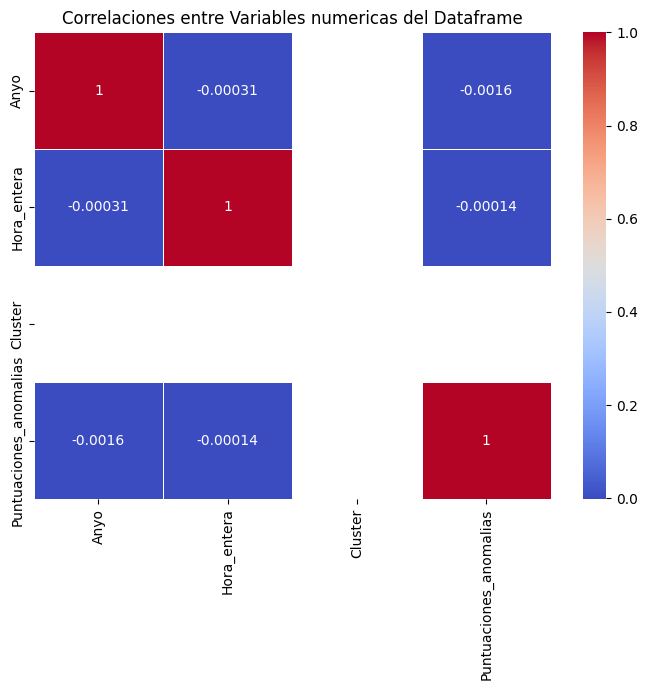

In [7]:

# Correlaciones y Relaciones

# Seleccionar solo las columnas numéricas
columnas_numericas = data.select_dtypes(include='number')
plt.figure(figsize= (7,7), edgecolor="b")
sns.heatmap(columnas_numericas.corr(), annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlaciones entre Variables numericas del Dataframe')

# Mostrar la gráfica
plt.tight_layout()
plt.show()


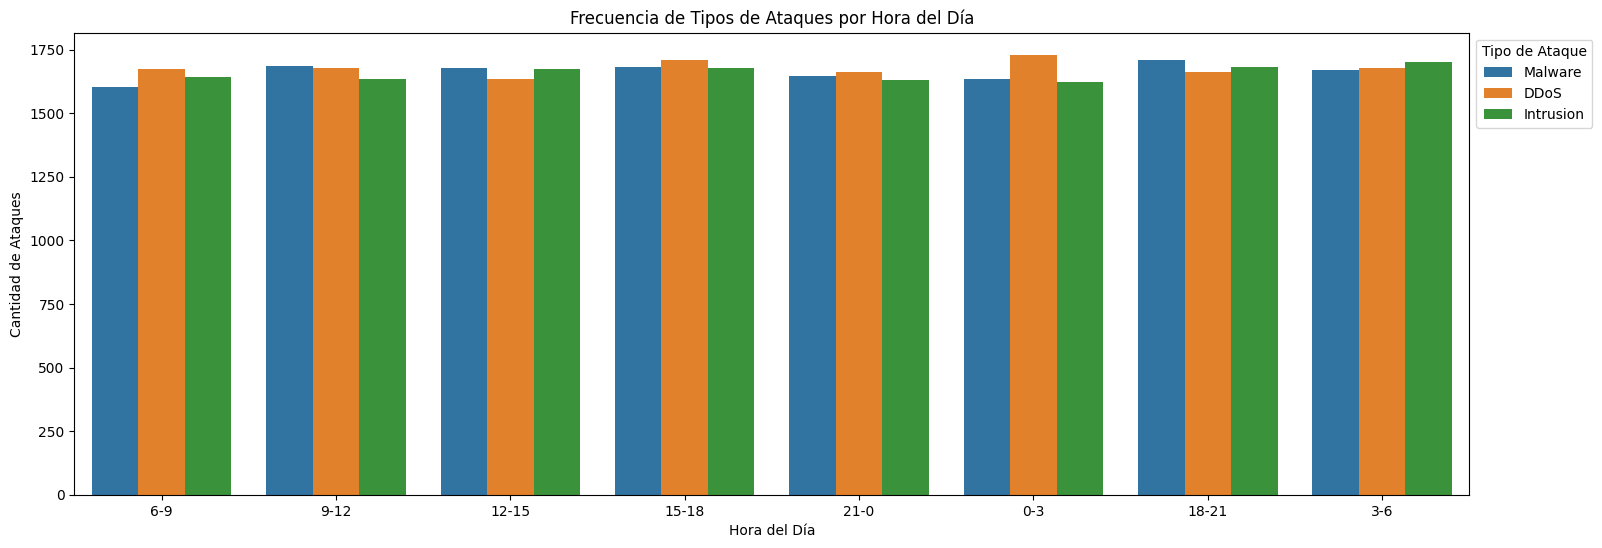

In [9]:
##Análisis de tipo de ataque:


# Gráfico de barras para la frecuencia de tipos de ataques por hora
plt.figure(figsize=(18, 6))
sns.countplot(x='Intervalo', hue='Tipo_ataque', data=data)
plt.title('Frecuencia de Tipos de Ataques por Hora del Día')
plt.xlabel('Hora del Día')
plt.ylabel('Cantidad de Ataques')
plt.legend(title='Tipo de Ataque', bbox_to_anchor=(1, 1))
plt.show()

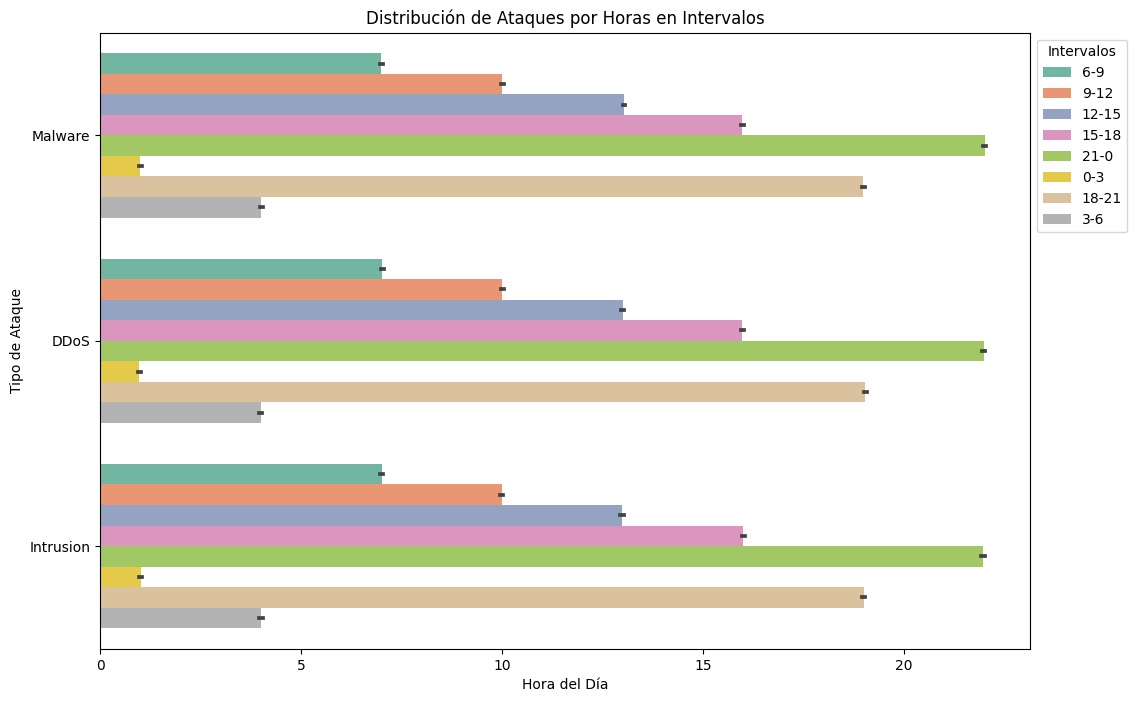

In [40]:

#Crear un bar plot para la distribución de ataques por horas en intervalos
plt.figure(figsize=(12, 8))
sns.barplot(x='Hora_entera', y='Tipo_ataque', hue='Intervalo', data=data, palette='Set2')
plt.title('Distribución de Ataques por Horas en Intervalos')
plt.xlabel('Hora del Día')
plt.ylabel('Tipo de Ataque')
plt.legend(title='Intervalos', bbox_to_anchor=(1, 1))
plt.show()

In [41]:
#F_absolute tipo ataque
F_absoluta_ataque= data.Tipo_ataque.value_counts()
F_relativa_ataque= data.Tipo_ataque.value_counts(normalize=True)*100

#f_relativa turno de ataques
F_absoluta_intervalo= data.Intervalo.value_counts()
F_relativa_intervalo= data.Intervalo.value_counts(normalize=True)*100

#F_absolute conjuntamente
F_absoluta=data.groupby(['Tipo_ataque', 'Intervalo']).size().reset_index(name='Frecuencia Absoluta')

#f_relativa entre T.ataque y Hora
F_relativa = (data.groupby(['Tipo_ataque', 'Intervalo']).size() / len(data)).reset_index(name='Frecuencia Relativa')

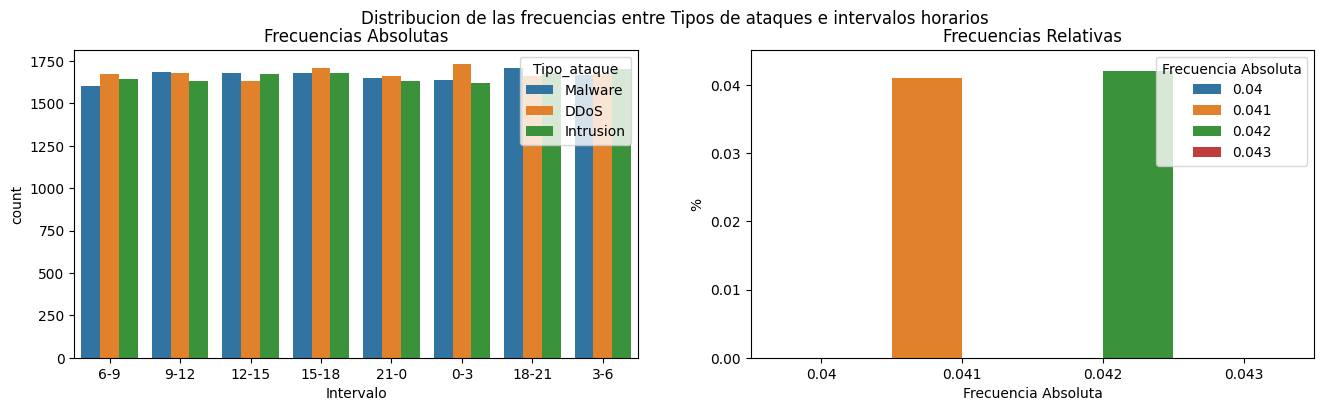

In [42]:
### Creamos figura y axes
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(16,4))# creamos la figura que gusrada los arrays en axs
fig.suptitle("Distribucion de las frecuencias entre Tipos de ataques e intervalos horarios");# suptitle le da titulo a toda la figura 
ax= axs.flatten()

sns.countplot(x = "Intervalo", data = data, ax=axs[0], hue ="Tipo_ataque")# FRECUENCIAS ABOSULTAS 
axs[0].set_title("Frecuencias Absolutas");

#PARA LA FRECUENCIA RELATIVA TENEMOS QUE CALCULARLA ANTES NOSOSTROS
# Calcular la frecuencia relativa
ocurrencias = len(data)
F_relativa = round(F_absoluta['Frecuencia Absoluta'] / ocurrencias, 3)
sns.barplot(x = F_relativa, y = F_relativa, hue = F_relativa, ax = axs[1], width=2)
axs[1].set_title("Frecuencias Relativas")
axs[1].set_ylabel("%");

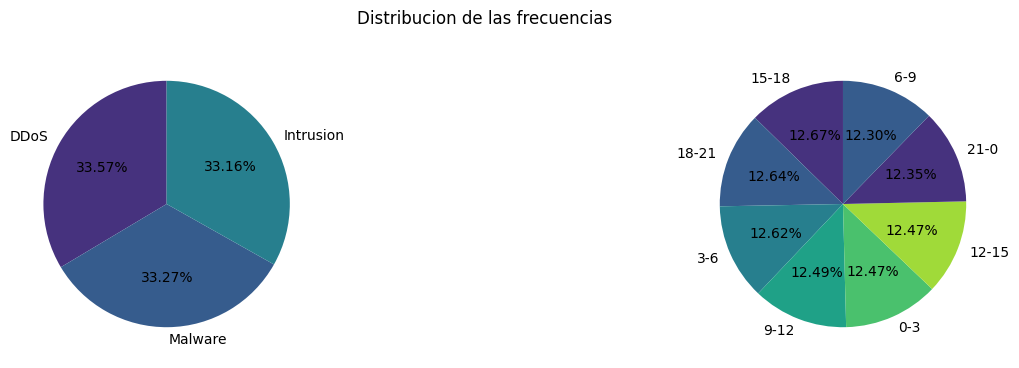

In [43]:
### Creamos figura y axes
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(16,4))# creamos la figura que gusrada los arrays en axs
fig.suptitle("Distribucion de las frecuencias ");# suptitle le da titulo a toda la figura 
data = F_absoluta_ataque

axs[0].pie(data.values,labels=data.index,autopct='%.2f%%', startangle= 90,colors=sns.color_palette('viridis'));

data = F_absoluta_intervalo

axs[1].pie(data.values,labels=data.index,autopct='%.2f%%', startangle= 90,colors=sns.color_palette('viridis'));

In [46]:

data = pd.read_excel(r"E:\Cursos\BC_Data_Science\Repositorio\ONLINE_DS_THEBRIDGE_V_NEW\proyecto EDA\DATASETS\DATASETS MODIFICADOS\df_modificado_final_eda.xlsx")

In [47]:

#F_absolute
F_absoluta=data.groupby(['Tipo_ataque', 'Intervalo']).size().reset_index(name='Frecuencia Absoluta')

F_absoluta

,Tipo_ataque,Intervalo,Frecuencia Absoluta
0,DDoS,0-3,1730
1,DDoS,12-15,1634
2,DDoS,15-18,1709
3,DDoS,18-21,1663
4,DDoS,21-0,1664
5,DDoS,3-6,1676
6,DDoS,6-9,1674
7,DDoS,9-12,1678
8,Intrusion,0-3,1623
9,Intrusion,12-15,1675


In [50]:
#f_relativa entre T.ataque y Hora
F_relativa = (data.groupby(['Tipo_ataque', 'Intervalo']).size() / len(data)).reset_index(name='Frecuencia Relativa')

F_relativa

,Tipo_ataque,Intervalo,Frecuencia Relativa
0,DDoS,0-3,0.043250
1,DDoS,12-15,0.040850
2,DDoS,15-18,0.042725
3,DDoS,18-21,0.041575
4,DDoS,21-0,0.041600
5,DDoS,3-6,0.041900
6,DDoS,6-9,0.041850
7,DDoS,9-12,0.041950
8,Intrusion,0-3,0.040575
9,Intrusion,12-15,0.041875
